# Chargeons en mémoire les données d'un sujet

Nous avons vu comment lire les données d'un fichier. Nous avons également vu que le script précédent est très dépendant à iPython. Nous allons ici charger les données d'un sujet en Python

In [43]:
import os
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Commençons par identifier le répertoire ALL_DATA et son contenu

In [44]:
DATA_PATH = os.path.join('..', '..', 'data', 'ALL_DATA')
ALL_SUJETS = os.listdir(DATA_PATH)
ALL_SUJETS

['sujet4',
 'sujet3',
 'sujet2',
 'sujet5',
 'sujet12',
 'sujet15',
 'sujet22',
 'sujet14',
 'sujet13',
 'sujet9',
 'sujet7',
 'sujet6',
 'sujet1',
 'sujet8',
 'sujet16',
 'sujet11',
 'sujet18',
 'sujet20',
 'sujet21',
 'sujet19',
 'sujet10',
 'sujet17']

Récupérons l'ensemble des contenus des sous-dossiers

In [45]:
for root, _, files in os.walk(DATA_PATH):
    if 'sujet' in root:
        print(root)
        print(files)

../../data/ALL_DATA/sujet4
['sujet4_pos_ent_0.2_pc_3.json', 'sujet4_pos_test_0.6_pc_15.json', 'sujet4_pos_ent_0.4_pe_8.json', 'sujet4_pos_test_0.4_pe_16.json', 'sujet4_pos_test_0.6_pc_19.json', 'sujet4_pos_ent_0.3_pc_5.json', 'sujet4_pos_test_0.4_pc_13.json', 'sujet4_pos_ent_0.4_pc_11.json', 'sujet4_pos_ent_0.2_pe_2.json', 'sujet4_pos_ent_0.4_pc_9.json', 'sujet4_pos_ent_0.3_pe_4.json', 'sujet4_pos_test_0.4_pc_17.json', 'sujet4_pos_test_0.6_pe_18.json', 'sujet4_pos_test_0.4_pe_12.json', 'sujet4_pos_test_0.6_pe_14.json', 'sujet4_pos_ent_0.2_pe_0.json', 'sujet4_pos_ent_0.3_pe_6.json', 'sujet4_pos_ent_0.2_pc_1.json', 'sujet4_pos_ent_0.3_pc_7.json', 'sujet4_pos_ent_0.4_pe_10.json']
../../data/ALL_DATA/sujet3
['sujet3_pos_ent_0.3_pc_6.json', 'sujet3_pos_ent_0.2_pc_0.json', 'sujet3_pos_ent_0.4_pc_10.json', 'sujet3_pos_test_0.6_pc_14.json', 'sujet3_pos_ent_0.3_pe_7.json', 'sujet3_pos_test_0.6_pc_18.json', 'sujet3_pos_test_0.4_pe_17.json', 'sujet3_pos_ent_0.2_pe_1.json', 'sujet3_pos_test_0.4_pc

Travaillons sur chaque sujet pour extraire les informations

In [4]:
UN_SUJET = iter(os.walk(DATA_PATH))

Maintenant que nous disposons d'un itérateur, relancer la cellule ci-dessous permettra de changer de sujet (répertoire de sujet)

In [46]:
while True:
    ROOT, _, FILES = next(UN_SUJET)
    if 'sujet' in ROOT:
        break
ROOT, FILES

('../../data/ALL_DATA/sujet3',
 ['sujet3_pos_ent_0.3_pc_6.json',
  'sujet3_pos_ent_0.2_pc_0.json',
  'sujet3_pos_ent_0.4_pc_10.json',
  'sujet3_pos_test_0.6_pc_14.json',
  'sujet3_pos_ent_0.3_pe_7.json',
  'sujet3_pos_test_0.6_pc_18.json',
  'sujet3_pos_test_0.4_pe_17.json',
  'sujet3_pos_ent_0.2_pe_1.json',
  'sujet3_pos_test_0.4_pc_12.json',
  'sujet3_pos_ent_0.3_pe_5.json',
  'sujet3_pos_ent_0.2_pe_3.json',
  'sujet3_pos_ent_0.4_pc_8.json',
  'sujet3_pos_ent_0.3_pc_4.json',
  'sujet3_pos_test_0.6_pe_14.json',
  'sujet3_pos_ent_0.2_pc_2.json',
  'sujet3_pos_ent_0.4_pe_11.json',
  'sujet3_pos_ent_0.4_pe_9.json',
  'sujet3_pos_test_0.6_pe_19.json',
  'sujet3_pos_test_0.4_pc_16.json',
  'sujet3_pos_test_0.4_pe_13.json'])

Nous disposons maintenant du chemin au répertoire et du nom de l'ensemble des fichiers qu'il contient. Réalisons un dictionnaire avec l'ensemble des informations pour ce sujet

In [47]:
UN_FICHIER = iter(FILES)

In [48]:
UN_ESSAI = next(UN_FICHIER)

In [49]:
UN_ESSAI

'sujet3_pos_ent_0.3_pc_6.json'

In [50]:
FILENAME, FILE_EXTENSION = os.path.splitext(UN_ESSAI)
FILENAME, FILE_EXTENSION

('sujet3_pos_ent_0.3_pc_6', '.json')

In [51]:
NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI = FILENAME.split('_')
NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI

('sujet3', 'pos', 'ent', '0.3', 'pc', '6')

- Le pseudo du sujet est unique pour le sujet.
- Le type de contrôle est unique pour le sujet ('pos' ou 'vit').
- La phase de passation varie entre 'ent' pour entrainement et 'test' pour le test.
- La fréquence de coupure varie au sein des phases de passation
- Le type de suivi de cible varie au sein des phases de passation
- Le numéro d'essai lors de la passation 

In [52]:
with open(os.path.join(ROOT, UN_ESSAI), 'r') as fnm:
    contenu = json.load(fnm)

In [53]:
contenu.keys()

dict_keys(['pv_cond', 'fb_err', 'pos_ct', 'percent_err', 'routine_time', 'reco_data', 'duree_essai', 'force_level'])

Dans ces données, nous devons bien comprendre et séparer le type. Nous avons 3 types d'informations :

- les méta-données
    - duree_essai
    - force_level
    - pv_cond
- les données brutes
    - routine_time
    - pos_ct
    - reco_data
- les données calculées
    - fb_erreur
    - percent_err

Si nous complétons avec les informations contenues dans le nom du fichier, nous obtenons :

- les méta-données
    - name (unique)
    - pv_cond ou ctrl (unique)
    - numessai
    - phase
    - cutoff
    - poursuite
    - duree_essai
    - force_level
- les données brutes
    - routine_time (temporelle)
    - pos_ct (temporelle)
    - reco_data (temporelle)
- les données calculées
    - fb_erreur (temporelle)
    - percent_err

Deux Dataframe peuvent donc être établis sur la base de ces données.

- DATA_STATIC
- DATA_TEMPO

Le Dataframe DATA_STATIC se construit selon le Dataframe DATA_TEMPO qui relate des données brutes accompagnées de variable calculée (fb_err).

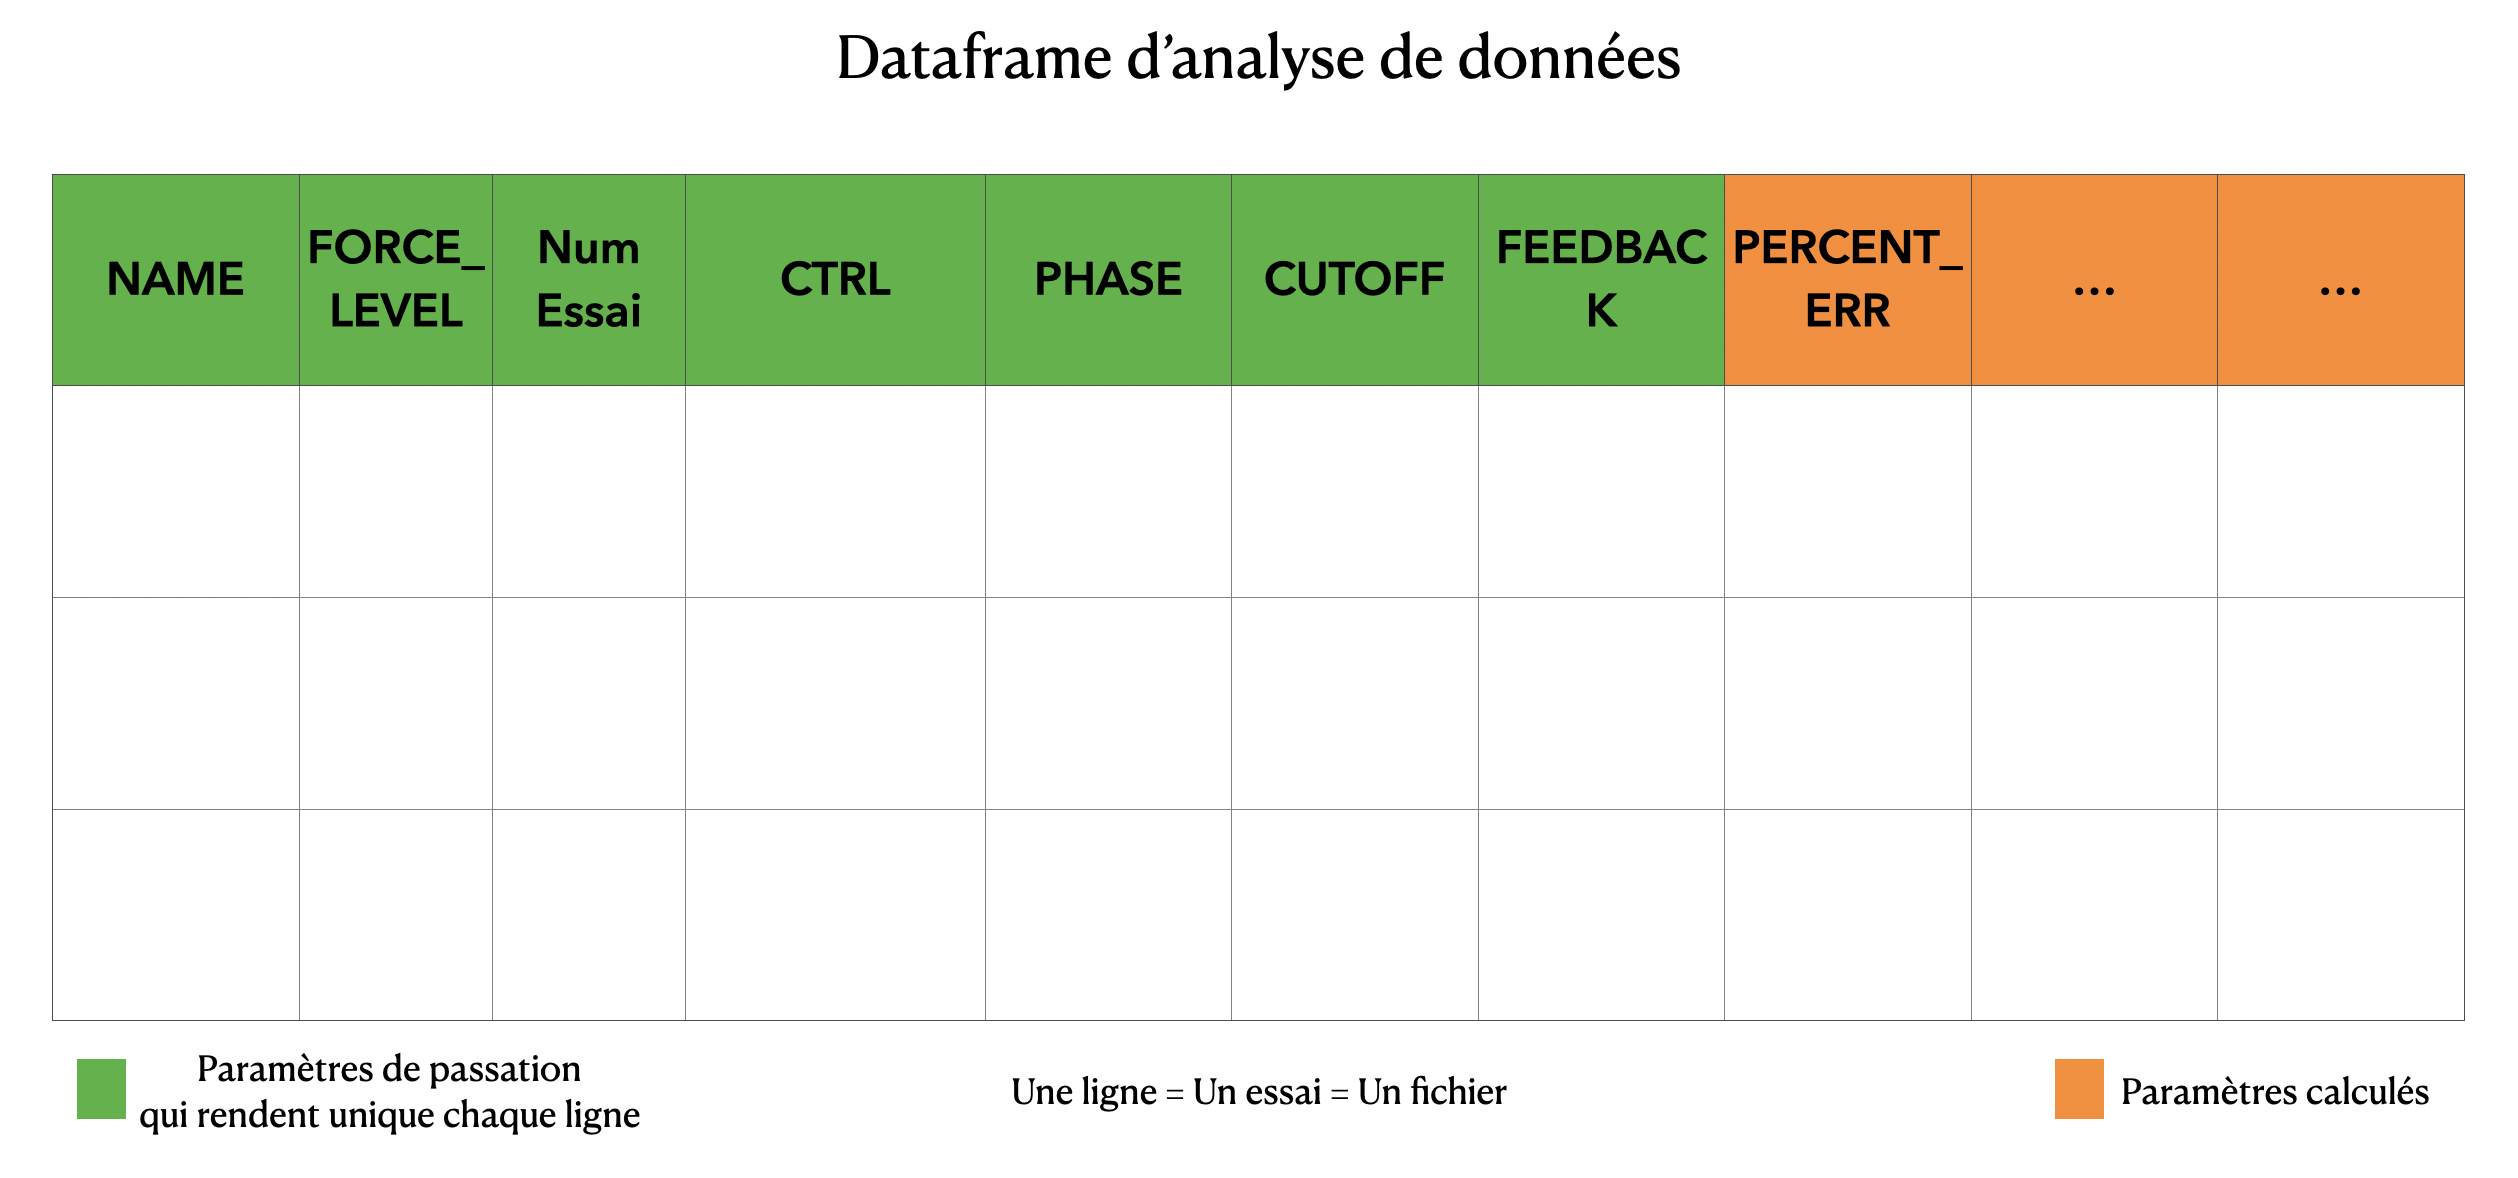

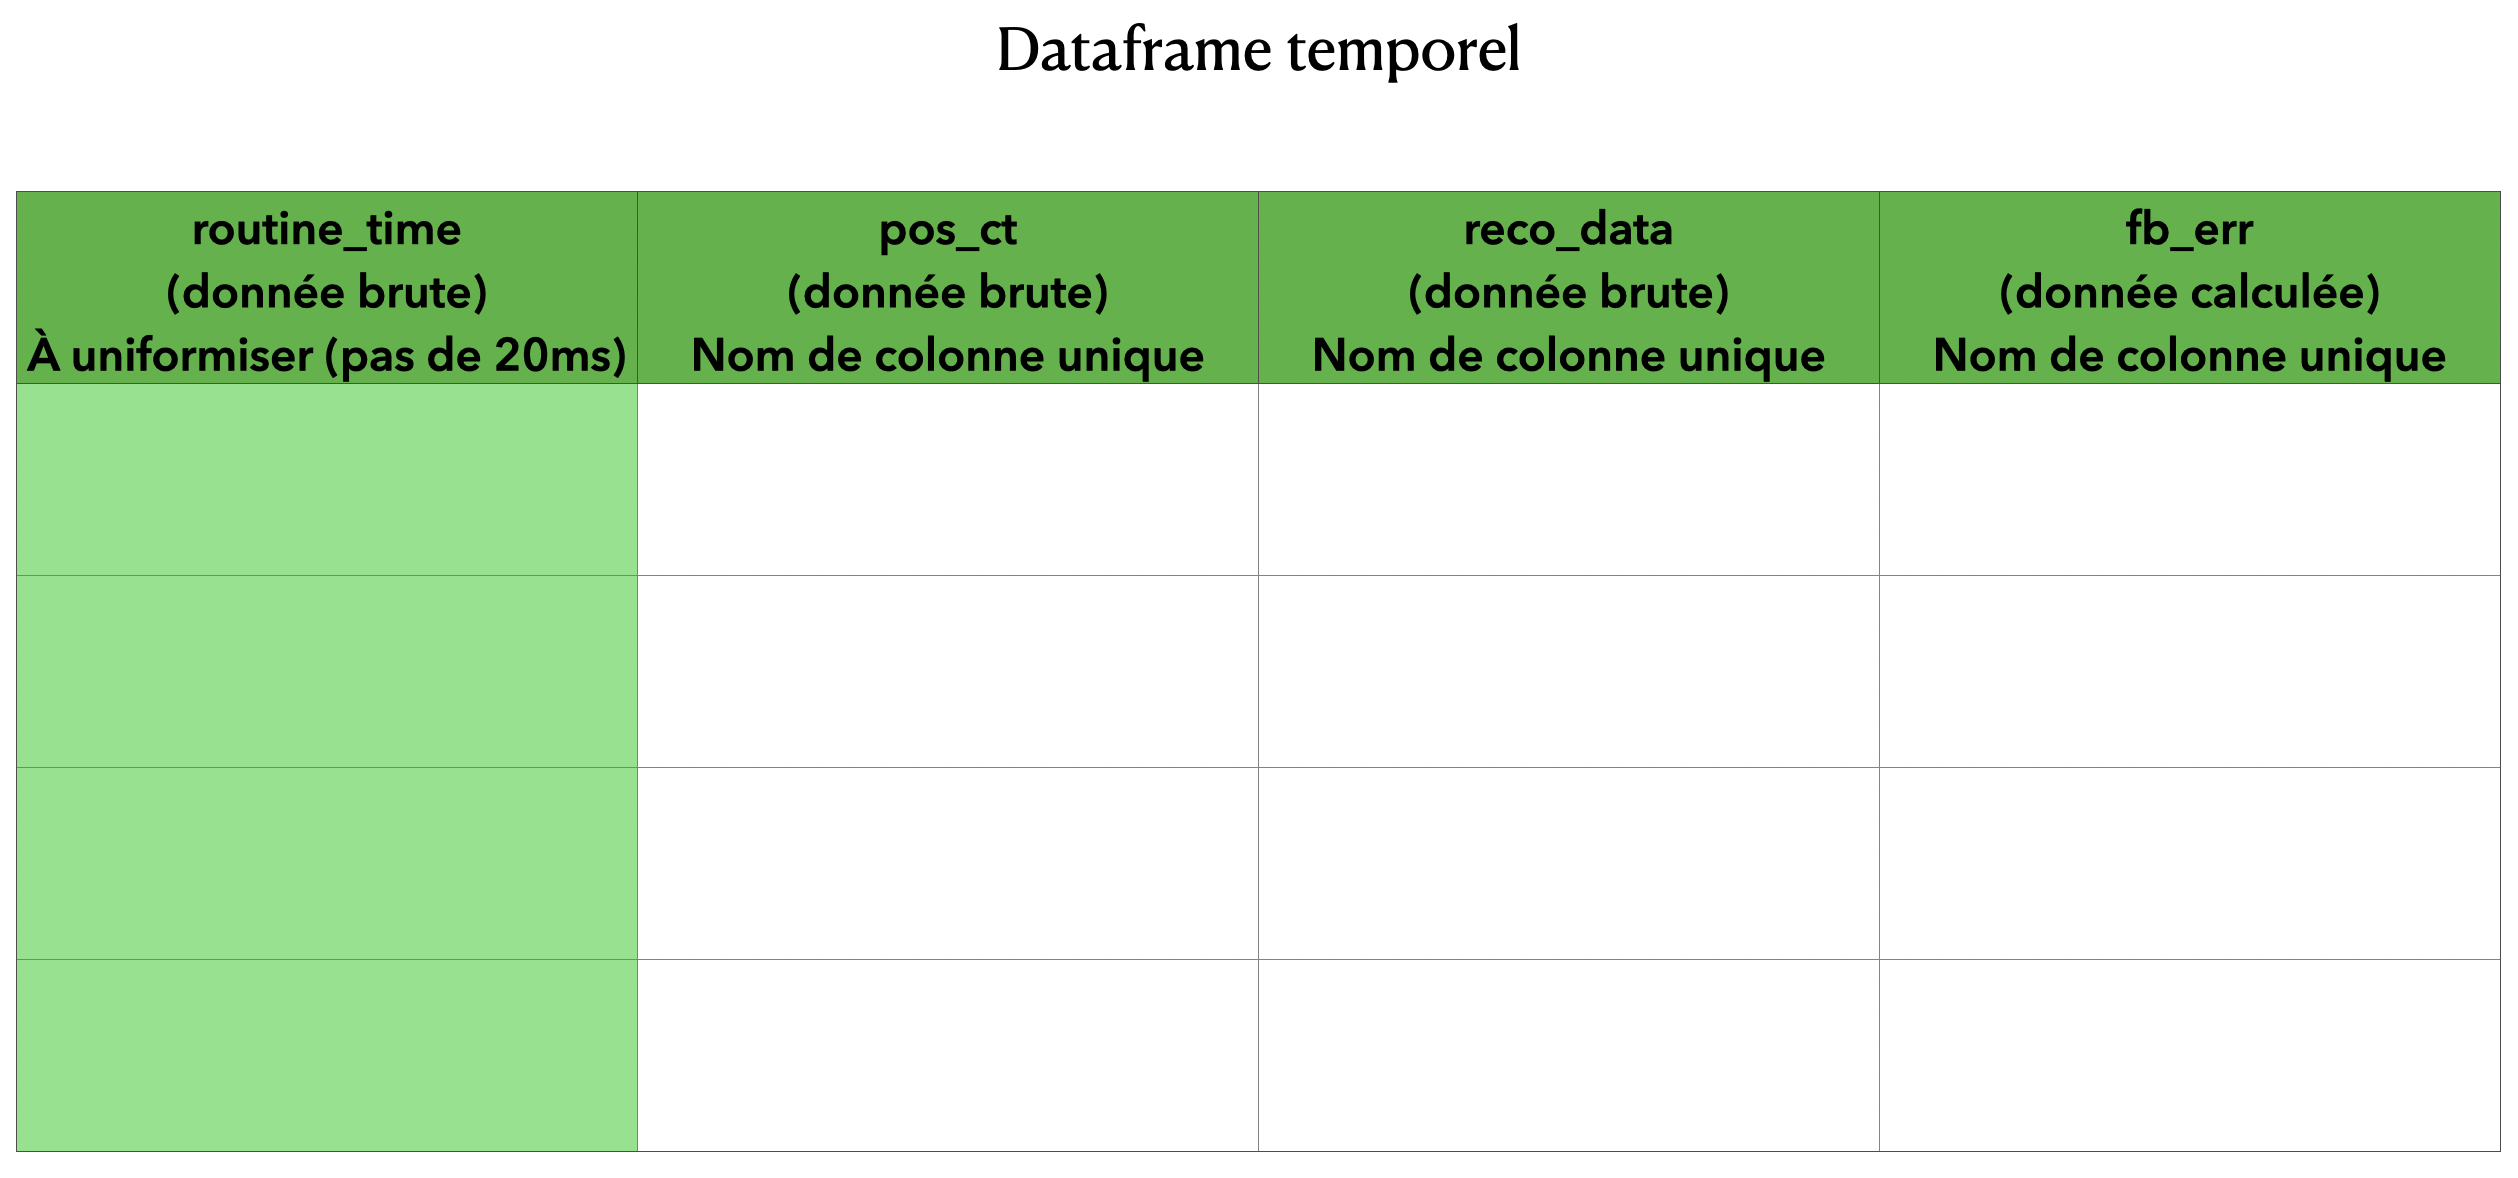

## Création de DATA_STATIC

In [54]:
DATA_STATIC_DICT = {'name' : [NAME],
                    'force_level' : [contenu['force_level']],
                    'num_essai' : [NUMESSAI],
                    'ctrl' : [CTRL],
                    'phase' : [PHASE],
                    'cutoff' : [CUTOFF],
                    'tracking': [POURSUITE],
                    'percent_err': [contenu['percent_err']]}

In [55]:
DATA_STATIC = pd.DataFrame(DATA_STATIC_DICT)

In [56]:
DATA_STATIC.head()

name  force_level num_essai ctrl phase cutoff tracking  percent_err
0  sujet3    17.821011         6  pos   ent    0.3       pc     3.451436

## Augmentation des données à travers les autres fichiers du sujet

Après répétition des cellules ci dessous jusqu'à STOP ITERATION qui intervient une fois que l'ensemble des fichiers ont été visités.

In [57]:
UN_ESSAI = next(UN_FICHIER)
FILENAME, FILE_EXTENSION = os.path.splitext(UN_ESSAI)
NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI = FILENAME.split('_')
with open(os.path.join(ROOT, UN_ESSAI), 'r') as fnm:
    contenu = json.load(fnm)

In [58]:
DATA_STATIC_DICT['name'].append(NAME)
DATA_STATIC_DICT['force_level'].append(contenu['force_level'])
DATA_STATIC_DICT['num_essai'].append(NUMESSAI)
DATA_STATIC_DICT['ctrl'].append(CTRL)
DATA_STATIC_DICT['phase'].append(PHASE)
DATA_STATIC_DICT['cutoff'].append(CUTOFF)
DATA_STATIC_DICT['tracking'].append(POURSUITE)
DATA_STATIC_DICT['percent_err'].append(contenu['percent_err'])

In [59]:
DATA_STATIC = pd.DataFrame(DATA_STATIC_DICT)
DATA_STATIC.head()

name  force_level num_essai ctrl phase cutoff tracking  percent_err
0  sujet3    17.821011         6  pos   ent    0.3       pc     3.451436
1  sujet3    17.821011         0  pos   ent    0.2       pc     6.693900

## création de DATA_TEMPO

`routine_time` commence au début de la routine de l'expérience mais le sujet n'est pas encore prêt donc le début de ce tableau n'est pas à prendre en considération

`pos_ct` est initailisé avec un 0 que l'on retrouvera toujours en plus que dans `reco_data` d'où la différence constante d'une valeur.

`fb_err` est simplement la différence entre `reco_data` et `pos_ct`. On retrouve bien sur les dernières valeurs. L'enregistrement pendant l'expérience n'était pas nécessaire. 

In [60]:
DATA_TEMPO_DICT = {'routine_time' : contenu['routine_time'],
                   'pos_ct' : contenu['pos_ct'],
                   'reco_data' : contenu['reco_data'],
                   'fb_err' : contenu['fb_err']} 

In [61]:
DATA_TEMPO = pd.DataFrame(DATA_TEMPO_DICT)

In [62]:
DATA_TEMPO.head()

routine_time     pos_ct  reco_data     fb_err
0     21.610418  24.731972   3.919879 -20.812093
1     21.626167 -22.790914   3.217910  26.008824
2     21.645802 -22.803107   3.878530  26.681637
3     21.666018 -22.814649   4.570248  27.384897
4     21.686241 -22.824751   4.797968  27.622719

In [63]:
DATA_TEMPO.describe()

routine_time       pos_ct    reco_data       fb_err
count   3001.000000  3001.000000  3001.000000  3001.000000
mean      51.613673     0.008241    -7.353270    -7.361512
std       17.331068   118.273571   114.924789    29.705608
min       21.610418  -310.583099  -354.554685  -119.370190
25%       36.611979   -57.980647   -59.787852   -19.785668
50%       51.614436     1.996710     0.945544    -4.274937
75%       66.613136    70.917441    62.596272     7.747309
max       81.615881   277.767866   267.199313   110.476952

Nous observons que pour un fichier, `routine_time`, exprimé en seconde, ne commence pas à 0. Il indique un indice temporel dans la boucle qui a été utilisé lors de l'expérience. Il dépend de la vitesse d'exécution du code et de la vitesse de rafraichisseemnt de l'écran. Pour palier cette variabilité, il est classique de voir des expressions de routine_time en nombre de frame de l'écran.

Nous allons travailler cette variable pour mieux la comprendre et générer un index temporel pour ce Dataframe.

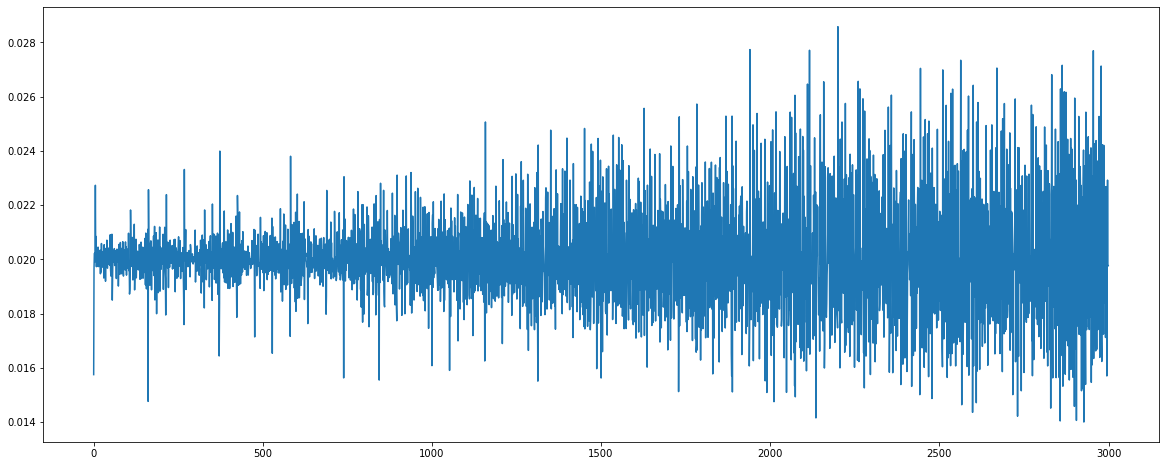

In [64]:
DIFF_TIME = np.diff(DATA_TEMPO['routine_time'].values)
plt.figure(figsize=(20,8))
plt.plot(DIFF_TIME);

La période de travail est proche de 20ms mais n'est pas stable dans le temps. Ce n'est pas un problème tant que nous en sommes conscients. 

In [65]:
np.median(DIFF_TIME)

0.01990185000022393

In [66]:
routine_time = DATA_TEMPO['routine_time'].values - DATA_TEMPO['routine_time'].values[0]
routine_time

array([0.00000000e+00, 1.57496000e-02, 3.53839000e-02, ...,
       5.99659479e+01, 5.99857016e+01, 6.00054636e+01])

In [67]:
routine_time_ar = np.round(routine_time, 3)
routine_time_ar

array([0.0000e+00, 1.6000e-02, 3.5000e-02, ..., 5.9966e+01, 5.9986e+01,
       6.0005e+01])

In [68]:
DATA_TEMPO.index = pd.to_datetime(routine_time_ar, origin=pd.Timestamp('2021-07-01'), unit='s')
DATA_TEMPO

routine_time     pos_ct  reco_data     fb_err
2021-07-01 00:00:00.000000000     21.610418  24.731972   3.919879 -20.812093
2021-07-01 00:00:00.016000000     21.626167 -22.790914   3.217910  26.008824
2021-07-01 00:00:00.035000064     21.645802 -22.803107   3.878530  26.681637
2021-07-01 00:00:00.056000000     21.666018 -22.814649   4.570248  27.384897
2021-07-01 00:00:00.076000000     21.686241 -22.824751   4.797968  27.622719
...                                     ...        ...        ...        ...
2021-07-01 00:00:59.923000064     81.533648  23.706187  37.251708  13.545521
2021-07-01 00:00:59.943000064     81.553445  24.021806  36.474043  12.452237
2021-07-01 00:00:59.966000128     81.576366  24.298080  35.526415  11.228335
2021-07-01 00:00:59.986000128     81.596119  24.534778  34.604772  10.069995
2021-07-01 00:01:00.005000192     81.615881  24.731972  34.193746   9.461775

[3001 rows x 4 columns]

In [69]:
routine_time = routine_time * 1000
routine_time = np.around(routine_time)
routine_time = routine_time.astype('int32')
routine_time

array([    0,    16,    35, ..., 59966, 59986, 60005], dtype=int32)

In [70]:
DATA_TEMPO.index = pd.to_datetime(routine_time, origin=pd.Timestamp('2021-07-01'), unit='ms')
DATA_TEMPO

routine_time     pos_ct  reco_data     fb_err
2021-07-01 00:00:00.000     21.610418  24.731972   3.919879 -20.812093
2021-07-01 00:00:00.016     21.626167 -22.790914   3.217910  26.008824
2021-07-01 00:00:00.035     21.645802 -22.803107   3.878530  26.681637
2021-07-01 00:00:00.056     21.666018 -22.814649   4.570248  27.384897
2021-07-01 00:00:00.076     21.686241 -22.824751   4.797968  27.622719
...                               ...        ...        ...        ...
2021-07-01 00:00:59.923     81.533648  23.706187  37.251708  13.545521
2021-07-01 00:00:59.943     81.553445  24.021806  36.474043  12.452237
2021-07-01 00:00:59.966     81.576366  24.298080  35.526415  11.228335
2021-07-01 00:00:59.986     81.596119  24.534778  34.604772  10.069995
2021-07-01 00:01:00.005     81.615881  24.731972  34.193746   9.461775

[3001 rows x 4 columns]

In [71]:
DATA_TEMPO_RES = DATA_TEMPO.asfreq(freq='1ms')

In [72]:
DATA_TEMPO_RES['routine_time']

2021-07-01 00:00:00.000    21.610418
2021-07-01 00:00:00.001          NaN
2021-07-01 00:00:00.002          NaN
2021-07-01 00:00:00.003          NaN
2021-07-01 00:00:00.004          NaN
                             ...    
2021-07-01 00:01:00.001          NaN
2021-07-01 00:01:00.002          NaN
2021-07-01 00:01:00.003          NaN
2021-07-01 00:01:00.004          NaN
2021-07-01 00:01:00.005    81.615881
Freq: L, Name: routine_time, Length: 60006, dtype: float64

In [73]:
DATA_TEMPO_RES['routine_time'] = DATA_TEMPO_RES['routine_time'].interpolate(method='linear')
DATA_TEMPO_RES

routine_time     pos_ct  reco_data     fb_err
2021-07-01 00:00:00.000     21.610418  24.731972   3.919879 -20.812093
2021-07-01 00:00:00.001     21.611402        NaN        NaN        NaN
2021-07-01 00:00:00.002     21.612386        NaN        NaN        NaN
2021-07-01 00:00:00.003     21.613371        NaN        NaN        NaN
2021-07-01 00:00:00.004     21.614355        NaN        NaN        NaN
...                               ...        ...        ...        ...
2021-07-01 00:01:00.001     81.611721        NaN        NaN        NaN
2021-07-01 00:01:00.002     81.612761        NaN        NaN        NaN
2021-07-01 00:01:00.003     81.613801        NaN        NaN        NaN
2021-07-01 00:01:00.004     81.614841        NaN        NaN        NaN
2021-07-01 00:01:00.005     81.615881  24.731972  34.193746   9.461775

[60006 rows x 4 columns]

In [74]:
DATA_TEMPO_RES = DATA_TEMPO_RES.interpolate(method='linear')
DATA_TEMPO_RES

routine_time     pos_ct  reco_data     fb_err
2021-07-01 00:00:00.000     21.610418  24.731972   3.919879 -20.812093
2021-07-01 00:00:00.001     21.611402  21.761791   3.876006 -17.885785
2021-07-01 00:00:00.002     21.612386  18.791611   3.832133 -14.959478
2021-07-01 00:00:00.003     21.613371  15.821431   3.788260 -12.033171
2021-07-01 00:00:00.004     21.614355  12.851250   3.744387  -9.106863
...                               ...        ...        ...        ...
2021-07-01 00:01:00.001     81.611721  24.690457  34.280278   9.589821
2021-07-01 00:01:00.002     81.612761  24.700836  34.258645   9.557810
2021-07-01 00:01:00.003     81.613801  24.711214  34.237012   9.525798
2021-07-01 00:01:00.004     81.614841  24.721593  34.215379   9.493786
2021-07-01 00:01:00.005     81.615881  24.731972  34.193746   9.461775

[60006 rows x 4 columns]

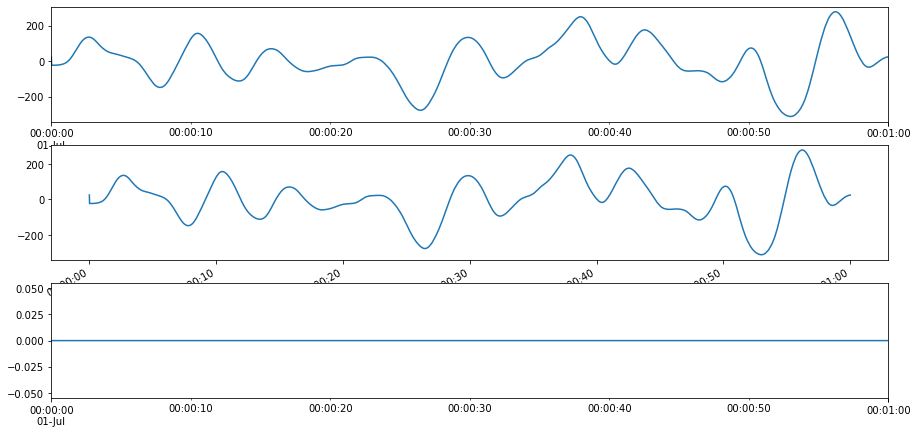

In [75]:
plt.figure(figsize=(15, 8))
plt.subplot(311)
DATA_TEMPO_RES['pos_ct'].plot()
plt.subplot(312)
DATA_TEMPO['pos_ct'].plot();
plt.subplot(313)
DIFF = DATA_TEMPO['pos_ct'] - DATA_TEMPO_RES['pos_ct']
DIFF = DIFF.interpolate(method='linear')
DIFF.plot();

In [76]:
DATA_TEMPO_RES['pos_ct']

2021-07-01 00:00:00.000    24.731972
2021-07-01 00:00:00.001    21.761791
2021-07-01 00:00:00.002    18.791611
2021-07-01 00:00:00.003    15.821431
2021-07-01 00:00:00.004    12.851250
                             ...    
2021-07-01 00:01:00.001    24.690457
2021-07-01 00:01:00.002    24.700836
2021-07-01 00:01:00.003    24.711214
2021-07-01 00:01:00.004    24.721593
2021-07-01 00:01:00.005    24.731972
Freq: L, Name: pos_ct, Length: 60006, dtype: float64

In [77]:
DATA_TEMPO['pos_ct']

2021-07-01 00:00:00.000    24.731972
2021-07-01 00:00:00.016   -22.790914
2021-07-01 00:00:00.035   -22.803107
2021-07-01 00:00:00.056   -22.814649
2021-07-01 00:00:00.076   -22.824751
                             ...    
2021-07-01 00:00:59.923    23.706187
2021-07-01 00:00:59.943    24.021806
2021-07-01 00:00:59.966    24.298080
2021-07-01 00:00:59.986    24.534778
2021-07-01 00:01:00.005    24.731972
Name: pos_ct, Length: 3001, dtype: float64

In [78]:
DATA_TEMPO_HOMOGENE = DATA_TEMPO_RES.asfreq(freq='20ms')
DATA_TEMPO_HOMOGENE

routine_time     pos_ct  reco_data     fb_err
2021-07-01 00:00:00.000     21.610418  24.731972   3.919879 -20.812093
2021-07-01 00:00:00.020     21.630301 -22.793481   3.356988  26.150469
2021-07-01 00:00:00.040     21.650615 -22.805855   4.043225  26.849080
2021-07-01 00:00:00.060     21.670063 -22.816669   4.615792  27.432462
2021-07-01 00:00:00.080     21.690223 -22.826265   4.671371  27.497636
...                               ...        ...        ...        ...
2021-07-01 00:00:59.920     81.530508  23.635301  37.323786  13.688484
2021-07-01 00:00:59.940     81.550476  23.974463  36.590693  12.616229
2021-07-01 00:00:59.960     81.570386  24.226008  35.773622  11.547614
2021-07-01 00:00:59.980     81.590193  24.463768  34.881265  10.417497
2021-07-01 00:01:00.000     81.610681  24.680078  34.301911   9.621833

[3001 rows x 4 columns]

Validation de la cohérence d'interpoler sur fb_err ?

In [79]:
DATA_TEMPO_HOMOGENE['reco_data'].values - DATA_TEMPO_HOMOGENE['pos_ct'].values

array([-20.81209271,  26.150469  ,  26.84907987, ...,  11.54761356,
        10.41749686,   9.62183268])

Nous pouvons nous demander si une interpolation linéaire est justifiée ou si un 'spline' d'ordre 2 n'aurait pas été mieux.

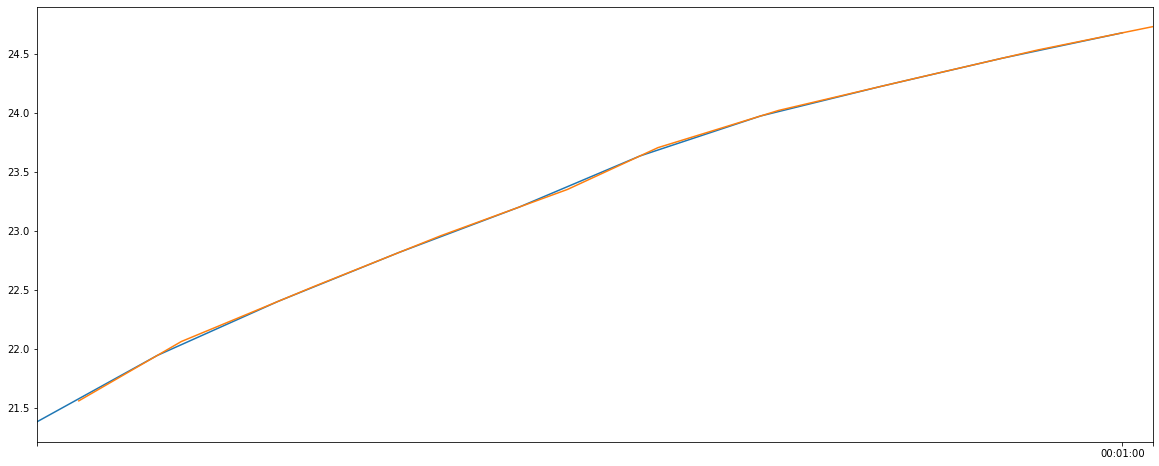

In [80]:
plt.figure(figsize=(20, 8))
DATA_TEMPO_HOMOGENE['pos_ct'][-10:].plot()
DATA_TEMPO['pos_ct'][-10:].plot();

Notre Dataframe DATA_TEMPO ou DATA_TEMPO_HOMOGENE ne contient qu'un fichier. Nous ne pouvons poursuivre sans rendre unique les noms des colonnes.

In [81]:
DATA_TEMPO_HOMOGENE.columns

Index(['routine_time', 'pos_ct', 'reco_data', 'fb_err'], dtype='object')

In [82]:
DATA_TEMPO_HOMOGENE = DATA_TEMPO_HOMOGENE.rename(columns={"pos_ct": f"pos_ct_{FILENAME}",
                                                          "reco_data": f"reco_data_{FILENAME}",
                                                          "fb_err": f"fb_err_{FILENAME}"})
DATA_TEMPO_HOMOGENE = DATA_TEMPO_HOMOGENE.drop(columns=['routine_time'])
DATA_TEMPO_HOMOGENE.head()

pos_ct_sujet3_pos_ent_0.2_pc_0  \
2021-07-01 00:00:00.000                       24.731972   
2021-07-01 00:00:00.020                      -22.793481   
2021-07-01 00:00:00.040                      -22.805855   
2021-07-01 00:00:00.060                      -22.816669   
2021-07-01 00:00:00.080                      -22.826265   

                         reco_data_sujet3_pos_ent_0.2_pc_0  \
2021-07-01 00:00:00.000                           3.919879   
2021-07-01 00:00:00.020                           3.356988   
2021-07-01 00:00:00.040                           4.043225   
2021-07-01 00:00:00.060                           4.615792   
2021-07-01 00:00:00.080                           4.671371   

                         fb_err_sujet3_pos_ent_0.2_pc_0  
2021-07-01 00:00:00.000                      -20.812093  
2021-07-01 00:00:00.020                       26.150469  
2021-07-01 00:00:00.040                       26.849080  
2021-07-01 00:00:00.060                       27.432462  
2021-07-01 00:00:00.080                       27.497636

## Augmentation des données à travers les autres fichiers du sujet

Après répétition des cellules ci dessous jusqu'à STOP ITERATION qui intervient une fois que l'ensemble des fichiers ont été visités.

In [83]:
UN_ESSAI = next(UN_FICHIER)
FILENAME, FILE_EXTENSION = os.path.splitext(UN_ESSAI)
with open(os.path.join(ROOT, UN_ESSAI), 'r') as fnm:
    contenu = json.load(fnm)

DATA_TEMPO_DICT = {'routine_time' : contenu['routine_time'],
                   'pos_ct' : contenu['pos_ct'],
                   'reco_data' : contenu['reco_data'],
                   'fb_err' : contenu['fb_err']}

DATA_TEMPO = pd.DataFrame(DATA_TEMPO_DICT)

routine_time = DATA_TEMPO['routine_time'].values - DATA_TEMPO['routine_time'].values[0]
routine_time = routine_time * 1000
routine_time = np.around(routine_time)
routine_time = routine_time.astype('int32')
DATA_TEMPO.index = pd.to_datetime(routine_time, origin=pd.Timestamp('2021-07-01'), unit='ms')
DATA_TEMPO_RES = DATA_TEMPO.asfreq(freq='1ms')
DATA_TEMPO_RES = DATA_TEMPO_RES.interpolate(method='linear')
DATA_TEMPO_HOM = DATA_TEMPO_RES.asfreq(freq='20ms')
DATA_TEMPO_HOM = DATA_TEMPO_HOM.rename(columns={"pos_ct": f"pos_ct_{FILENAME}",
                                                "reco_data": f"reco_data_{FILENAME}",
                                                "fb_err": f"fb_err_{FILENAME}"})
DATA_TEMPO_HOM = DATA_TEMPO_HOM.drop(columns=['routine_time'])

DATA_TEMPO_HOMOGENE = pd.concat([DATA_TEMPO_HOMOGENE, DATA_TEMPO_HOM], axis=1)
DATA_TEMPO_HOMOGENE.head()

pos_ct_sujet3_pos_ent_0.2_pc_0  \
2021-07-01 00:00:00.000                       24.731972   
2021-07-01 00:00:00.020                      -22.793481   
2021-07-01 00:00:00.040                      -22.805855   
2021-07-01 00:00:00.060                      -22.816669   
2021-07-01 00:00:00.080                      -22.826265   

                         reco_data_sujet3_pos_ent_0.2_pc_0  \
2021-07-01 00:00:00.000                           3.919879   
2021-07-01 00:00:00.020                           3.356988   
2021-07-01 00:00:00.040                           4.043225   
2021-07-01 00:00:00.060                           4.615792   
2021-07-01 00:00:00.080                           4.671371   

                         fb_err_sujet3_pos_ent_0.2_pc_0  \
2021-07-01 00:00:00.000                      -20.812093   
2021-07-01 00:00:00.020                       26.150469   
2021-07-01 00:00:00.040                       26.849080   
2021-07-01 00:00:00.060                       27.432462   
2021-07-01 00:00:00.080                       27.497636   

                         pos_ct_sujet3_pos_ent_0.4_pc_10  \
2021-07-01 00:00:00.000                       -84.099514   
2021-07-01 00:00:00.020                       -32.207789   
2021-07-01 00:00:00.040                       -32.203021   
2021-07-01 00:00:00.060                       -32.200821   
2021-07-01 00:00:00.080                       -32.202810   

                         reco_data_sujet3_pos_ent_0.4_pc_10  \
2021-07-01 00:00:00.000                           10.561309   
2021-07-01 00:00:00.020                           10.567622   
2021-07-01 00:00:00.040                           10.491141   
2021-07-01 00:00:00.060                           10.510520   
2021-07-01 00:00:00.080                           10.201637   

                         fb_err_sujet3_pos_ent_0.4_pc_10  
2021-07-01 00:00:00.000                        94.660822  
2021-07-01 00:00:00.020                        42.775411  
2021-07-01 00:00:00.040                        42.694162  
2021-07-01 00:00:00.060                        42.711341  
2021-07-01 00:00:00.080                        42.404447